In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

In [2]:
df = pd.read_csv(r'../../results/vehicle-year-transition2.csv', delimiter=',', skiprows=0, low_memory=False)

In [3]:
df=df.set_index('vehicle_year')

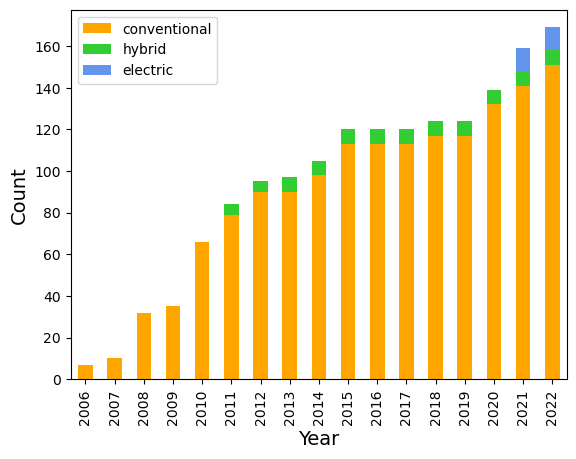

In [4]:
ax = df.plot.bar(stacked=True, color=[ "orange", "limegreen", "cornflowerblue" ] )
plt.ylabel("Count", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.savefig(r'../../figures/year-transition-powertrain.png', dpi=400, bbox_inches='tight')
plt.show()

In [5]:
df = pd.read_csv(r'../../results/computed-fuel-rates.csv', delimiter=',', skiprows=0, low_memory=False)

In [6]:
df.columns

Index(['Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1',
       'ServiceDateTime', 'Unnamed: 0', 'DateKey', 'CalendarDate', 'Year',
       'Month', 'OpKey', 'Operator', 'RtKey', 'RtKey2', 'Route', 'RouteName',
       'TripKey', 'Trip', 'StopKey', 'Stop', 'StopName', 'Lat', 'Lon',
       'Vehicle', 'VehicleType', 'SeatedCap', 'TotalCap', 'Boards', 'Alights',
       'Onboard', 'Bike', 'Wheelchair', 'Weekday', 'Hour', 'Minute', 'Second',
       'Date', 'Daytype', 'time', 'time_delta', 'time_delta_in_seconds',
       'dist', 'Speed', 'Acceleration', 'Powertrain', 'VehicleModel',
       'Vehicle_mass', 'elevation', 'grade', 'Energy'],
      dtype='object')

In [7]:
df['VehicleModel'].unique()

array(['Gillig 30 ', 'NEW FLYER XE35', 'PROTERRA CATALYST BE-40',
       'NEW FLYER XE40', 'Gillig 35', 'Gillig 40', 'NEW FLYER XD35',
       'NEW FLYER XDE40', 'NEW FLYER XD40', 'NEW FLYER XDE60 (ARTIC)'],
      dtype=object)

In [8]:
df.VehicleModel=df.VehicleModel.astype(str).str.replace('Gillig 30 ', 'C1')
df.VehicleModel=df.VehicleModel.astype(str).str.replace('NEW FLYER XE35', 'E1')
df.VehicleModel=df.VehicleModel.astype(str).str.replace('PROTERRA CATALYST BE-40', 'E3')
df.VehicleModel=df.VehicleModel.astype(str).str.replace('NEW FLYER XE40', 'E2')
df.VehicleModel=df.VehicleModel.astype(str).str.replace('Gillig 35', 'C2')
df.VehicleModel=df.VehicleModel.astype(str).str.replace('Gillig 40', 'C3')
df.VehicleModel=df.VehicleModel.astype(str).str.replace('NEW FLYER XD35', 'C4')
df.VehicleModel=df.VehicleModel.astype(str).str.replace('NEW FLYER XDE40', 'H1')
df.VehicleModel=df.VehicleModel.astype(str).str.replace('NEW FLYER XD40', 'C5')
df.VehicleModel=df.VehicleModel.astype(str).str.replace('NEW FLYER XDE60', 'H2')
df.VehicleModel=df.VehicleModel.astype(str).str.replace('ARTIC', '')
df.VehicleModel=df.VehicleModel.astype(str).str.replace('(', '')
df.VehicleModel=df.VehicleModel.astype(str).str.replace(')', '')

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_2120\3282684310.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.VehicleModel=df.VehicleModel.astype(str).str.replace('(', '')
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_2120\3282684310.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.VehicleModel=df.VehicleModel.astype(str).str.replace(')', '')


In [9]:
df.VehicleModel.unique()

array(['C1', 'E1', 'E3', 'E2', 'C2', 'C3', 'C4', 'H1', 'C5', 'H2 '],
      dtype=object)

In [10]:
df.VehicleModel=df.VehicleModel.astype(str).str.replace('H2 ', 'H2')

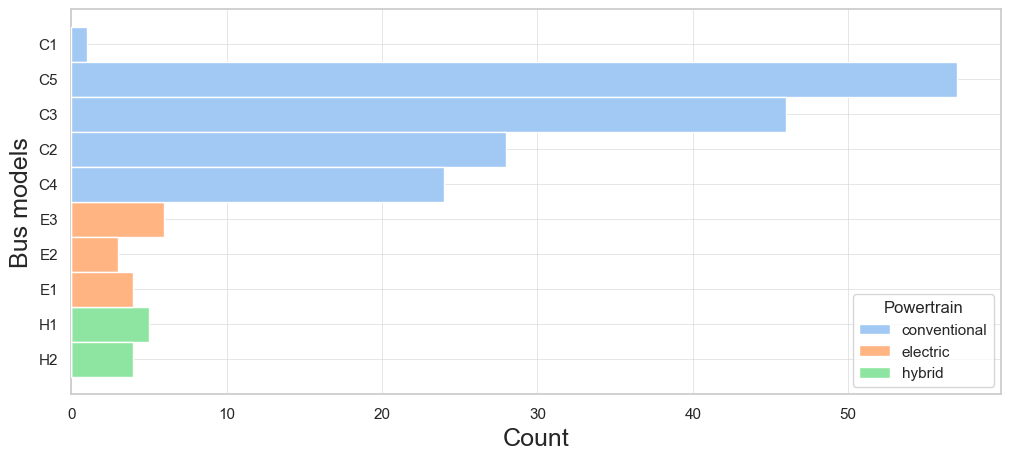

In [11]:
plot=df.groupby(by=['Vehicle'])['VehicleModel'].max()
df_plot = df.groupby('Vehicle').agg({'VehicleModel':'max', 'Powertrain':'max'})[['VehicleModel','Powertrain']].reset_index()
df_plot=df_plot.sort_values(by=['Powertrain'], ascending=True)
sns.set(rc={'figure.figsize':(12,5)})
sns.set_theme(style="whitegrid", palette="pastel")
p = sns.histplot(data=df_plot, y='VehicleModel', hue="Powertrain", zorder=3, alpha  = 1)
p.set_ylabel("Bus models", fontsize=18)
p.set_xlabel("Count", fontsize=18)
p.grid(color='lightgrey', linewidth=0.4)


#p.set_xticks(fontsize=14)
#p.set_yticks(fontsize=14)
figure = p.get_figure()    
figure.savefig(r'../../figures/hist-fleet-models.png', dpi=400, bbox_inches='tight')

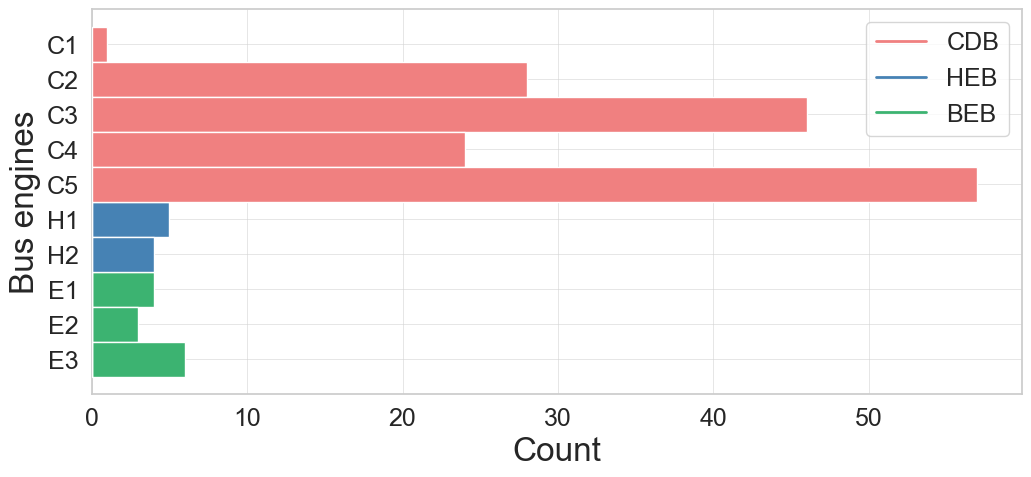

In [15]:
my_palette = ["lightcoral", "steelblue", "mediumseagreen"]

plot = df.groupby(by=['Vehicle'])['VehicleModel'].max()
df_plot = df.groupby('Vehicle').agg({'VehicleModel':'max', 'Powertrain':'max'})[['VehicleModel','Powertrain']].reset_index()
#df_plot['Powertrain_order'] = df_plot['Powertrain'].map({'conventional': 0, 'hybrid': 1, 'electric': 2})
df_plot['VehicleModel_order'] = df_plot['VehicleModel'].map({'C1': 0, 'C2': 1, 'C3': 2, 'C4': 3, 'C5': 4, 'H1': 5, 'H2': 6, 'E1': 7, 'E2': 8, 'E3': 9})
df_plot=df_plot.sort_values(by=['VehicleModel_order'], ascending=True).drop('VehicleModel_order', axis=1)

sns.set(rc={'figure.figsize':(12,5)})
sns.set_palette(my_palette)
sns.set_style("whitegrid")

p = sns.histplot(data=df_plot, y='VehicleModel', hue="Powertrain", zorder=3, alpha=1)
p.set_ylabel("Bus engines", fontsize=24)
p.set_xlabel("Count", fontsize=24)

p.tick_params(labelsize=18)
#p.legend(['CDB', 'HEB', 'BEB'])
custom_lines = [Line2D([0], [0], color='lightcoral', lw=2),
                Line2D([0], [0], color='steelblue', lw=2),
                Line2D([0], [0], color='mediumseagreen', lw=2)]
p.legend(custom_lines, ['CDB', 'HEB', 'BEB'], fontsize=18)

p.grid(color='lightgrey', linewidth=0.4)
figure = p.get_figure()    
figure.savefig('../../figures/hist-fleet-models.png', dpi=400, bbox_inches='tight')

plt.show()
